<a href="https://colab.research.google.com/github/praveenkumarprabakar18/Classnotes/blob/main/PA_Lab_test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering




     


In [20]:
data_url = '/zoo.csv'
dataset = pd.read_csv(data_url)


In [21]:
dataset.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
dataset.shape

In [11]:
dataset.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [17]:
x=pd.DataFrame(dataset.iloc[:,1:17])
y=dataset.loc[:,dataset.columns=='class_type']
x
y



,class_type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=32)

In [25]:
steps=[('Modelling', GaussianNB())]
pipeline=Pipeline(steps)

pipeline.fit(x_train, y_train)
test_data = pd.concat([x_test, y_test], axis=1)
test_data["prediction"] = pipeline.predict(x_test)
display(test_data)
print("Naive Bayes Accuracy:", pipeline.score(x_test,y_test))
print(pipeline.predict_proba(x_test))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,prediction
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,1
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4,4
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,1
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2,2
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,7
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,4
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,1
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,1


Naive Bayes Accuracy: 0.9354838709677419
[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


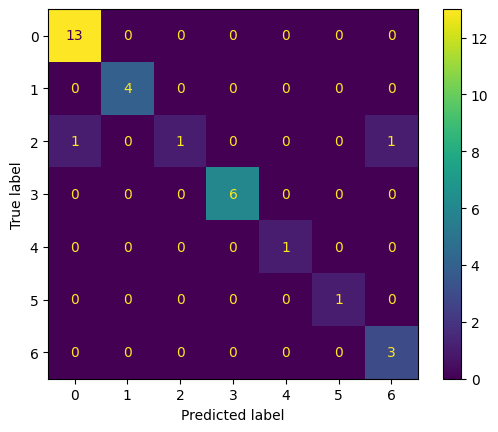

In [29]:
y_pred=pipeline.predict(x_test)
acc=metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

c_matrix=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

cmd=ConfusionMatrixDisplay(c_matrix)
cmd.plot()

In [32]:
dataset1=pd.DataFrame(dataset.iloc[:,1:18])
dataset1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [34]:
scalar=StandardScaler()
scaled_segment=scalar.fit_transform(dataset1)
scaled_segment

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [35]:

wcss=[]
for i in range(1,18):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_segment)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[1717.0000000000002,
 1225.605201556306,
 967.2526203016596,
 727.7406455020225,
 650.6500641208095,
 593.4129674252457,
 533.2300183634845,
 486.48045830081014,
 437.56038578787764,
 415.9095912152503,
 384.84045412560545,
 353.9620888460852,
 320.3624764499723,
 302.5433257558965,
 282.0913732297288,
 264.5273851495394,
 251.76106442552236]

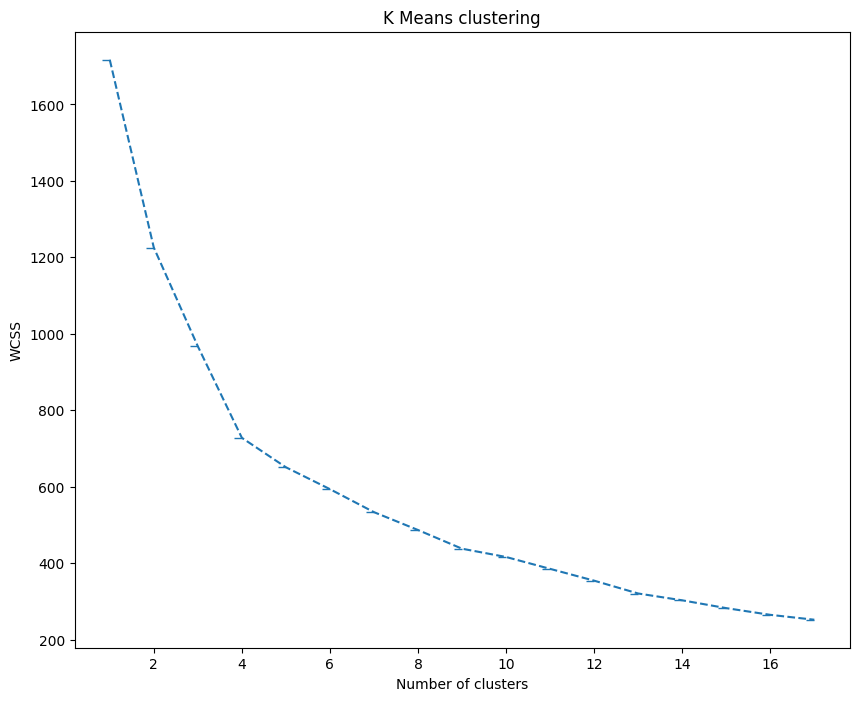

In [38]:
plt.figure(figsize=(10,8))
plt.plot(range(1,18), wcss, marker=0, linestyle= '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("K Means clustering")
plt.show()

In [ ]:
#From the above elbow graph 4 clusters would be a right segmentation

In [39]:
kmeans=KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans.fit(scaled_segment)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [40]:
segmented_kmeans=dataset1.copy()
segmented_kmeans["Segments"]=kmeans.labels_
segmented_kmeans


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Segments
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,3
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,3


In [41]:
segment_analysis=segmented_kmeans.groupby(["Segments"]).mean()
segment_analysis

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
Segments,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.850000,0.1,0.000000,0.850000,0.800000,1.000000,1.000000,0.300000,0.150000,0.750000,0.400000,1.000000,0.050000,0.300000,3.550000
1,1.000000,0.000000,0.025641,1.0,0.051282,0.102564,0.512821,0.974359,1.000000,1.000000,0.000000,0.051282,3.538462,0.846154,0.205128,0.769231,1.000000
2,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.000000,1.000000,0.000000,0.000000,2.095238,1.000000,0.142857,0.333333,2.047619
3,0.190476,0.000000,0.952381,0.0,0.285714,0.428571,0.523810,0.142857,0.142857,0.666667,0.238095,0.000000,4.619048,0.047619,0.047619,0.047619,6.333333


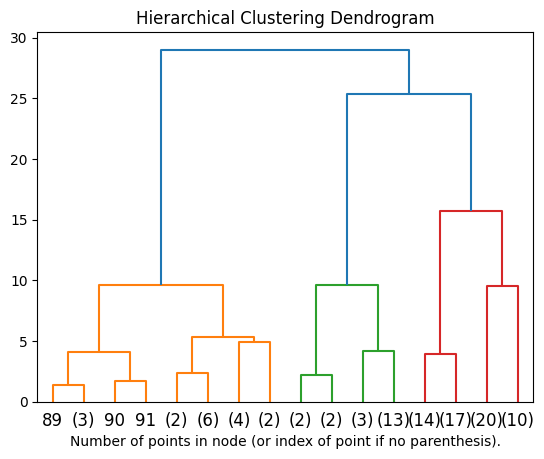

In [53]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(dataset1)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

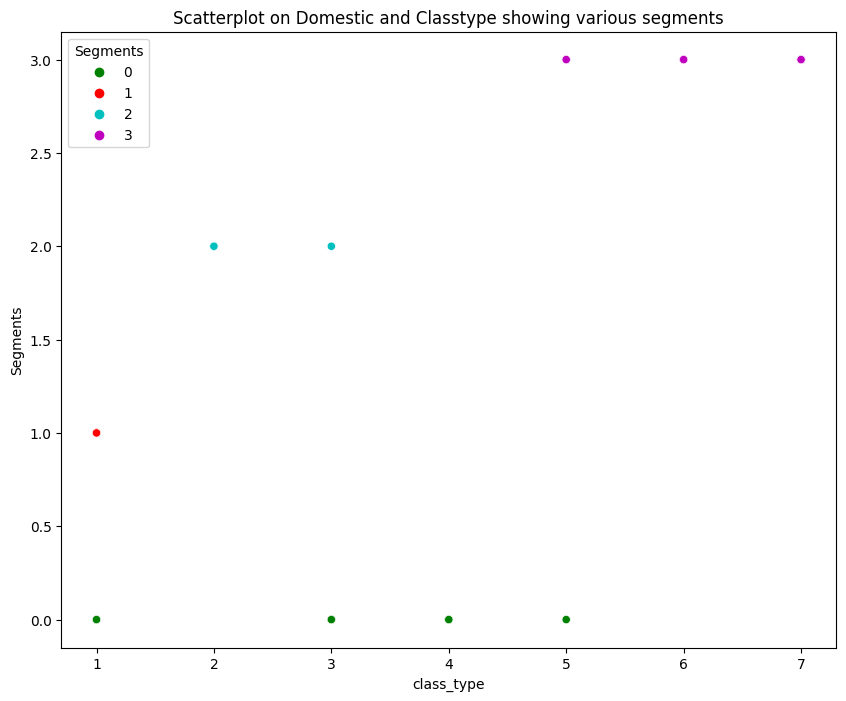